# Analysing Spoofed False Positive files in dev set - version 2.0 dataset

> Take those spoofed files from the development set that are misclassifed as genuine. Apply SLIME to understand and correlate the behaviour of classes !

## 1) The top 10 spoofed confident correctly classified files : high scores

                               Gen prob     Spf Prob      Log Liklihood ratio
   

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

In [64]:
# Load the prediction file
# Predictions file that has three columns: genuin, spoofed prob and log likehood ratio

pred_file='model_3sec_relu_0.5_run8/predictions/dev_prediction.txt'

In [65]:
all_predictions = []
all_gens = []
all_spoofs = []

with open(pred_file) as f:
    all_predictions = [line.strip() for line in f]
    
all_gen_predictions = all_predictions[:760]                    # first 760 files in dev are genuine
all_spf_predictions = all_predictions[760:]                  # files from 761-1710 are spoofed examples

In [66]:
all_scores = []

with open(pred_file) as f:
    all_scores = [line.strip().split(' ')[2] for line in f]
    
all_gen_scores = all_scores[:760]
all_spf_scores = all_scores[760:]

In [67]:
print(len(all_gen_scores))
print(len(all_spf_scores))

760
950


In [68]:
print(all_spf_scores[0:10])

['-4.07604', '-8.03727', '-4.36948', '-4.70375', '-1.91081', '-0.697803', '1.95232', '-3.31911', '-1.7775', '-0.200272']


In [69]:
spf_sort_index = np.argsort(all_spf_scores)

## Prepare file-list for top spoofed files

In [70]:
# We select all those spoofed files for which genuine class receive probability > 90% 
# Print the results, its fine for now. 

fname='index_file_list/allSpoofIndexList_FP.txt'
f=open(fname,'w')

spfFileList = list()
count=0

for i in spf_sort_index:
    score= all_spf_predictions[i].strip().split(' ')[2]
    if float(score) > 2.1:
        spfFileList.append(str(i) + ' ' + str(all_spf_predictions[i]))
        count += 1
print('Total count = ',count)

# Reverse sort the list- so that spoofed files with highest spoof probability are on top
sorted_spfList = spfFileList[::-1]
for line in sorted_spfList:
    f.write(line+'\n')
    print(line)
f.close()

Total count =  31
124 0.99494 0.0050603 5.28126
145 0.994667 0.00533347 5.2284
107 0.993838 0.00616233 5.08312
127 0.990827 0.00917263 4.68232
169 0.990257 0.00974347 4.62137
134 0.989272 0.010728 4.52412
185 0.988507 0.0114931 4.45445
101 0.98691 0.0130899 4.32274
942 0.984027 0.0159734 4.12073
119 0.983193 0.0168072 4.069
115 0.981208 0.0187921 3.95535
182 0.979586 0.0204137 3.87092
137 0.978663 0.0213374 3.82573
135 0.975803 0.0241972 3.69702
138 0.975048 0.0249515 3.66555
671 0.97111 0.0288897 3.51496
170 0.970352 0.0296477 3.48827
104 0.968184 0.0318164 3.41544
103 0.953591 0.0464087 3.02275
187 0.947347 0.052653 2.88994
146 0.945786 0.0542142 2.85907
105 0.938188 0.0618124 2.71985
173 0.937851 0.0621486 2.71406
125 0.937002 0.0629981 2.69958
159 0.93653 0.0634701 2.69161
163 0.927019 0.0729815 2.54177
132 0.926887 0.0731126 2.53983
162 0.923503 0.0764975 2.49092
139 0.920361 0.0796395 2.44726
150 0.912333 0.0876668 2.34246
160 0.910534 0.0894659 2.32017


## Analysing Time: The top two components from SLIME - True positive Spoofed case

Note, that under time analysis, we have cut our input spectrogram into 10 different temporal components/segments, where each segment correpsonds to

> ***300 mili seconds***

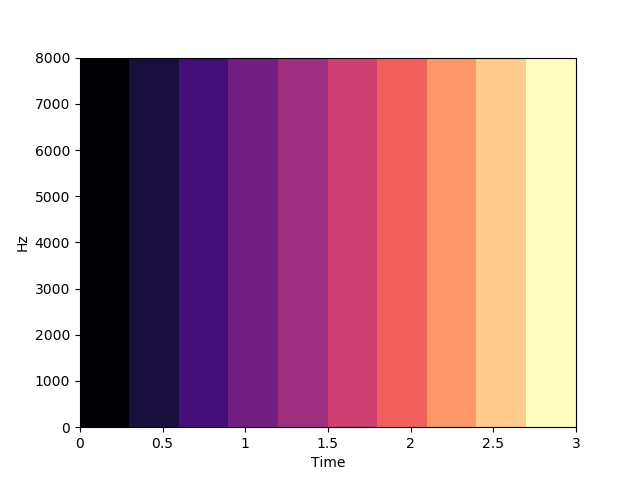

In [71]:
# Show how we cut the spectrogram in timexfrequency

Image("time.png")

In [72]:
file = 'top_two_explanation_indices/time/spoof_FP.txt'

In [73]:
%%bash
cat top_two_explanation_indices/time/spoof_FP.txt  | head

2 0
7 9
0 -999
1 -999
7 1
0 1
6 7
6 -999
8 -999
2 -999


In [74]:
def get_top1_top2_list(file):
    with open(file) as f:
        top1 = [int(line.strip().split(' ')[0]) for line in f]
    with open(file) as f:  
        top2 = [int(line.strip().split(' ')[1]) for line in f if int(line.strip().split(' ')[1]) != -999]
    return top1, top2    

In [75]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)

In [76]:
print(top2)

[0, 9, 1, 1, 7, 7, 6, 6, 1, 7, 0, 6]


In [77]:
print(len(top1))
print(len(top2))

21
12


In [78]:
def get_counts(datalist, key):
    count=0
    for i in range(0,len(datalist)):
        if datalist[i] == key:
            count+=1
    return count            

In [79]:
def print_component_distribution(comps, predList, order):
    print('Printing component weigting distribution for Top:', order)
    for i in comps:
        print('Component ' + str(i) + ' : ' + str(get_counts(predList, i)))    

### Using the top1 components - given by SLIME (Time segmentation)

> For ***run1*** we get following distribution:

    

In [80]:
comps=[0,1,2,3,4,5,6,7,8,9]    # In time we have 10 segments/components

In [81]:
# Print distribution on top1
order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 6
Component 1 : 3
Component 2 : 2
Component 3 : 0
Component 4 : 0
Component 5 : 0
Component 6 : 4
Component 7 : 5
Component 8 : 1
Component 9 : 0


*** Observation ***
> We still see the same kind of behaviour that is for spoofed class.


### Using the top2 components - given by SLIME (Time segmentation)

> For ***Run1*** we get following distribution


In [82]:
# Print distribution on top2

#order = 2
#print_component_distribution(comps, top2, order)

In [83]:
# Get those file index having component4 in top explanation

key =0
fname='index_file_list/allSpoofIndexList_FP.txt'
with open(fname) as f:
    file_idxs = [line.strip() for line in f]  
    
# Write the top component index to the file and further analysis

fname='top_two_explanation_indices/time/topExplanation_list_spoof_FP.txt'
id4_indexFiles=list() 

f=open(fname,'w')
for i in range(len(top1)):
    if top1[i]==key:    # if top explanation index is 3 (which is actually 4)
        id4_indexFiles.append(file_idxs[i])
        f.write(str(file_idxs[i])+'\n')
        
f.close()

### Note: 
> the file topExplanation_list_spoof_TP.txt will have four columns
> The first column denotes file index (index from 0), second and third specifies genuine and spoofed probability, while last specifies the LLR score



## Analysing Freq: The top two components from SLIME - True positive Spoofed

Note, that under frequency analysis, we have cut our input spectrogram into 8 different frequency components/segments, where each segment correpsonds to

> ***1000 Hz frequency***

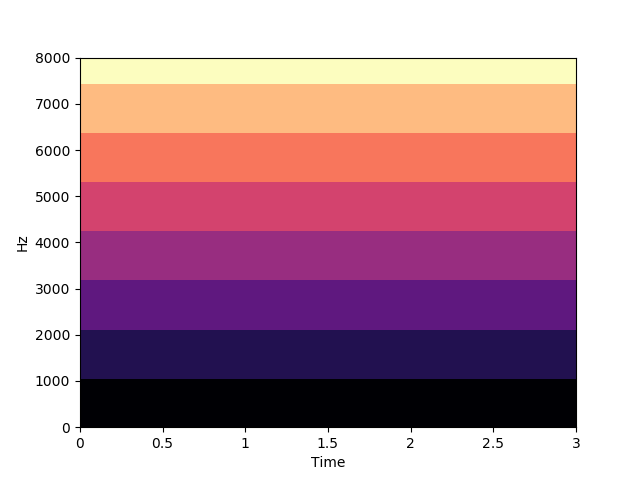

In [84]:
# Show how we cut the spectrogram in timexfrequency

Image("frequency.png")

In [85]:
file = 'top_two_explanation_indices/freq/spoof_FP.txt'

In [86]:
%%bash
cat 'top_two_explanation_indices/freq/spoof_FP.txt' | head

# the top two components 7 6 dominates the explanation

6 3
6 -999
3 -999
6 3
0 1
6 1
6 2
6 3
5 0
3 6


In [87]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)

In [88]:
print(len(top1))
print(len(top2))

30
23


## Top 1 component distribution - Frequency

In [89]:
comps = [0,1,2,3,4,5,6,7]   # in Frequency we have 8 components

In [90]:
# Print distribution on top1

order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 2
Component 1 : 0
Component 2 : 0
Component 3 : 5
Component 4 : 0
Component 5 : 1
Component 6 : 22
Component 7 : 0


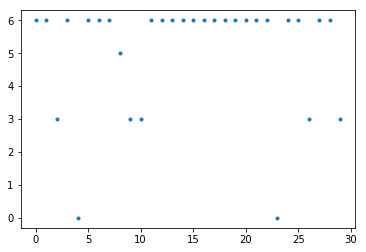

In [91]:
# Plot the distribution
plt.plot(top1,'.')

***Observation***
> We see that under frequency analysis, the top explanation appears to be favouring frequency bin 7000Hz. Same behaviour that was found for spoofed class. But, since these are misclassified as genuine files, we should have got clues somewhat we found for genuine classes.

***Out of total 31 spoofed misclassified files with 90% probability for genuine class ***
 1. 22 belongs to 7000Hz
 1. 5 for 4000 Hz
 1. 2 for 1000 Hz


## Top 2 component distribution - Frequency

In [92]:
# Print distribution on top2
#top2 = [value for value in top2 if value > 0]     # make sure to remove those -999 instances from top2
#order = 2
#print_component_distribution(comps, top2, order)

In [93]:
# Plot the top2 distribution
#plt.plot(top2,'.')

In [94]:
# Get those file index having component8 in top explanation (as for frequency we get top explanation at index8)

top = 6   # Define this value for each case of analysis

fname='index_file_list/allSpoofIndexList_FP.txt'
with open(fname) as f:
    #file_idxs = [int(line.strip().split(' ')[0]) for line in f]
    file_idxs = [line.strip() for line in f]
    
#Write the top component index to the file and further analysis
fname='top_two_explanation_indices/freq/topExplanation_list_spoof_FP.txt'
id8_indexFiles=list() 

f=open(fname,'w')
for i in range(len(top1)):
    if top1[i]==top:    # if top explanation index is 3 (which is actually 4)
        id8_indexFiles.append(file_idxs[i])
        f.write(str(file_idxs[i])+'\n')
        
f.close()

## Analysing timexFreq: The top two components from SLIME - True positive Spoofed case

Note, that under timexfrequency analysis, we have cut our input spectrogram into 30 different segments, where each segment correpsonds to

> ***600 msec in time and around 1333 Hz in frequency***

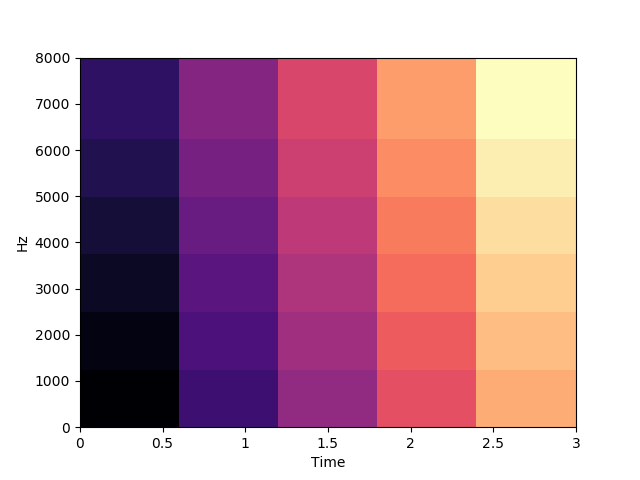

In [95]:
# Show how we cut the spectrogram in timexfrequency

Image("timexfrequency.png")

In [96]:
file = 'top_two_explanation_indices/tf/spoof_FP.txt'

In [97]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)
print(len(top1))
print(len(top2))

31
31


## Top 1 component distribution - time x Frequency

In [98]:
comps = np.arange(0,30)   # in timexfrequency we have 30 components

In [99]:
# Print distribution on top1

order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 2
Component 1 : 3
Component 2 : 1
Component 3 : 0
Component 4 : 0
Component 5 : 12
Component 6 : 0
Component 7 : 0
Component 8 : 0
Component 9 : 1
Component 10 : 2
Component 11 : 1
Component 12 : 0
Component 13 : 0
Component 14 : 1
Component 15 : 0
Component 16 : 0
Component 17 : 0
Component 18 : 0
Component 19 : 0
Component 20 : 0
Component 21 : 2
Component 22 : 0
Component 23 : 4
Component 24 : 1
Component 25 : 0
Component 26 : 0
Component 27 : 0
Component 28 : 0
Component 29 : 1


*** Observation ***
> Distribution shows highest for Component 5, which is similar to what we saw for the spoofed class !!

## Top 2 component distribution - time x Frequency

In [100]:
# Print distribution on top2

#order = 2
#print_component_distribution(comps, top2, order)

# Overall Summary from this study

**Time segmentation**

>We still see the same kind of behaviour that is for spoofed class.

**Frequency segmentation**
> We see that under frequency analysis, the top explanation appears to be favouring frequency bin 7000Hz. Same behaviour that was found for spoofed class. But, since these are misclassified as genuine files, we should have got clues somewhat we found for genuine classes.

**TimexFrequency segmentation**
> Distribution shows highest for Component 5, which is similar to what we saw for the spoofed class !!


In other words, from this study it is bit hard to give proper conclusion. We were hoping that the spoofed files which has been misclassified as genuine by the classifier exhibits properties of a genuine class, somehow, but these results show that these files exhibit property of spoofed class itself..